In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [18]:
feature_data = pd.read_csv("relevant_features_single_tags.csv")

scaler = StandardScaler()
scaler.fit(feature_data.to_numpy())
scaled_data = scaler.transform(feature_data.to_numpy())

In [19]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 7,
}

In [9]:
inertia = []
silhouette_coef = []

for k in range(1, 11):
    print(k)
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

    if (k != 1):
        silhouette_coef.append(silhouette_score(scaled_data, kmeans.labels_))

1
2
3
4
5
6
7
8
9
10


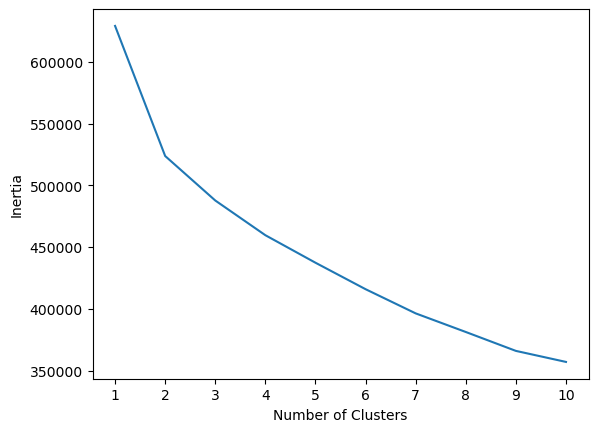

In [10]:
plt.plot(range(1, 11), inertia)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [20]:
kl = KneeLocator(
    range(1, 11), inertia, curve="convex", direction="decreasing"
)

print(kl.elbow)

3


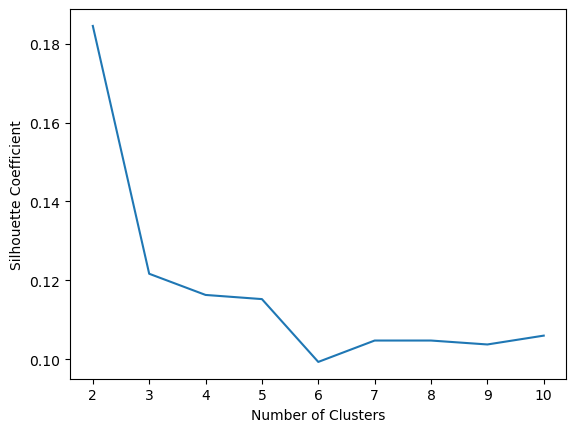

In [12]:
plt.plot(range(2, 11), silhouette_coef)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [24]:
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(scaled_data)

kmeans_3_centers = {
    "centers": kmeans.cluster_centers_,
    "labels": kmeans.labels_,
    "inertia": kmeans.inertia_,
    "iterations": kmeans.n_iter_,
    "features": kmeans.n_features_in_,
}

In [25]:
def parse_tags(tag):
    tag = tag.strip("[")
    tag = tag.strip("]")
    labels = []
    if ", " in tag: 
        for label in tag.split(", "):
            labels.append(label.strip("'"))
    else:
        labels = [tag.strip("'")]
    return labels

In [28]:
labeled_data = pd.read_csv("single_tags.csv")

In [29]:
tags_represented = {
    0: {},
    1: {},
    2: {},
}

for i in np.unique(kmeans_3_centers["labels"]):
    indices = np.where(kmeans_3_centers["labels"] == i)[0]
    for index in indices:
        for label in parse_tags(labeled_data._get_value(index, "seeds")):
            if  label not in tags_represented[i].keys():
                tags_represented[i].update({label: 1})
            else:
                tags_represented[i][label] += 1

print(tags_represented)

{0: {'aggressive': 189, 'angry': 209, 'angst-ridden': 4, 'confrontational': 5, 'defiant': 12, 'demonic': 16, 'explosive': 29, 'fierce': 188, 'harsh': 73, 'hostile': 4, 'hyper': 70, 'intense': 145, 'malevolent': 2, 'manic': 28, 'menacing': 50, 'nihilistic': 3, 'ominous': 45, 'outrageous': 2, 'provocative': 17, 'rebellious': 17, 'reckless': 4, 'savage': 21, 'uncompromising': 5, 'unsettling': 6, 'visceral': 3, 'volatile': 3, 'apocalyptic': 52, 'dark': 163, 'eerie': 95, 'fractured': 13, 'gloomy': 174, 'halloween': 109, 'macabre': 29, 'paranoid': 61, 'scary': 65, 'spooky': 114, 'suspenseful': 2, 'urgent': 32, 'bitter': 122, 'bleak': 34, 'brittle': 4, 'cold': 134, 'grim': 19, 'lonely': 85, 'nocturnal': 62, 'delicate': 52, 'dreamy': 86, 'ethereal': 87, 'gentle': 44, 'intimate': 60, 'introspective': 57, 'lazy': 96, 'meditative': 34, 'pastoral': 1, 'relaxed': 113, 'soothing': 60, 'sparse': 21, 'brash': 6, 'ironic': 56, 'sarcastic': 32, 'sardonic': 2, 'satirical': 3, 'wry': 9, 'ambitious': 9, 'b

In [30]:
cluster_zero = tags_represented[0]

cluster_zero = dict(sorted(cluster_zero.items(), key=lambda item: item[1]))

print(cluster_zero)

{'pastoral': 1, 'indulgent': 1, 'ramshackle': 1, 'self-conscious': 1, 'difficult': 1, 'refined': 1, 'resolute': 1, 'elegiac': 1, 'funereal': 1, 'greasy': 1, 'irreverent': 1, 'thuggish': 1, 'sugary': 1, 'bravado': 1, 'malevolent': 2, 'outrageous': 2, 'suspenseful': 2, 'sardonic': 2, 'hedonistic': 2, 'giddy': 2, 'understated': 2, 'gutsy': 2, 'swaggering': 2, 'meandering': 2, 'rollicking': 2, 'jittery': 2, 'dignified': 2, 'nihilistic': 3, 'visceral': 3, 'volatile': 3, 'satirical': 3, 'brassy': 3, 'elaborate': 3, 'hungry': 3, 'campy': 3, 'freewheeling': 3, 'weary': 3, 'effervescent': 3, 'boisterous': 3, 'celebratory': 3, 'rambunctious': 3, 'raucous': 3, 'distraught': 3, 'reassuring': 3, 'angst-ridden': 4, 'hostile': 4, 'reckless': 4, 'brittle': 4, 'rustic': 4, 'street-smart': 4, 'wintry': 4, 'sprawling': 4, 'exuberant': 4, 'perky': 4, 'confrontational': 5, 'uncompromising': 5, 'animated': 5, 'searching': 5, 'circular': 5, 'narcotic': 5, 'marching': 5, 'transparent': 5, 'unsettling': 6, 'br

In [31]:
cluster_one = tags_represented[1]

cluster_one = dict(sorted(cluster_one.items(), key=lambda item: item[1]))

print(cluster_one)

{'angst-ridden': 1, 'confrontational': 1, 'malevolent': 1, 'outrageous': 1, 'reckless': 1, 'visceral': 1, 'volatile': 1, 'feral': 1, 'fractured': 1, 'languid': 1, 'restrained': 1, 'brash': 1, 'capricious': 1, 'satirical': 1, 'hungry': 1, 'animated': 1, 'campy': 1, 'gleeful': 1, 'jovial': 1, 'resolute': 1, 'gutsy': 1, 'irreverent': 1, 'street-smart': 1, 'thuggish': 1, 'sugary': 1, 'confident': 1, 'kinetic': 1, 'distraught': 1, 'amiable': 1, 'translucent': 1, 'threatening': 2, 'reverent': 2, 'funereal': 2, 'greasy': 2, 'trashy': 2, 'bravado': 2, 'perky': 2, 'raucous': 2, 'rollicking': 2, 'rowdy': 2, 'sprightly': 2, 'transparent': 2, 'nihilistic': 3, 'rebellious': 3, 'ornate': 3, 'freewheeling': 3, 'regretful': 3, 'exuberant': 3, 'marching': 3, 'defiant': 4, 'savage': 4, 'spicy': 4, 'circular': 4, 'sprawling': 4, 'fiery': 4, 'good-natured': 4, 'demonic': 5, 'manic': 5, 'sardonic': 5, 'ambitious': 5, 'refined': 5, 'understated': 5, 'wintry': 5, 'meandering': 5, 'noble': 5, 'suspenseful': 6

In [32]:
cluster_two = tags_represented[2]

cluster_two = dict(sorted(cluster_two.items(), key=lambda item: item[1]))

print(cluster_two)

{'malevolent': 1, 'outraged': 1, 'suffocating': 1, 'reserved': 1, 'snide': 1, 'hedonistic': 1, 'reverent': 1, 'ramshackle': 1, 'self-conscious': 1, 'resolute': 1, 'springlike': 1, 'wintry': 1, 'effervescent': 1, 'athletic': 1, 'jittery': 1, 'consoling': 1, 'amiable': 1, 'angst-ridden': 2, 'uncompromising': 2, 'restrained': 2, 'feverish': 2, 'ornate': 2, 'austere': 2, 'refined': 2, 'regretful': 2, 'gutsy': 2, 'boisterous': 2, 'brittle': 3, 'gleeful': 3, 'stately': 3, 'understated': 3, 'swaggering': 3, 'circular': 3, 'noble': 3, 'hostile': 4, 'celebratory': 4, 'acerbic': 5, 'indulgent': 5, 'freewheeling': 5, 'difficult': 5, 'plaintive': 5, 'thuggish': 5, 'good-natured': 5, 'transparent': 5, 'volatile': 6, 'devotional': 6, 'animated': 6, 'irreverent': 6, 'marching': 6, 'rambunctious': 6, 'outrageous': 7, 'sardonic': 7, 'giddy': 7, 'elegiac': 7, 'weary': 7, 'greasy': 7, 'street-smart': 7, 'graceful': 7, 'sugary': 7, 'raucous': 7, 'nihilistic': 8, 'brassy': 8, 'sprawling': 8, 'rollicking': 

In [33]:
kmeans_3_labeled = pd.read_csv("single_tags.csv")
print(kmeans_3_labeled.shape)
kmeans_3_labeled.insert(len(kmeans_3_labeled.columns), "Labels", kmeans_3_centers["labels"], True)

print(kmeans_3_labeled.shape)

kmeans_3_labeled.to_csv("kmeans_3_standardized.csv")

(48390, 23)
(48390, 24)


In [34]:
#Song Sampling

c1_idx = np.where(kmeans_3_centers["labels"] == 0)[0]
c2_idx = np.where(kmeans_3_centers["labels"] == 1)[0]
c3_idx = np.where(kmeans_3_centers["labels"] == 2)[0]

c1_sample = np.random.choice(c1_idx, size=10, replace=False)
c2_sample = np.random.choice(c2_idx, size=10, replace=False)
c3_sample = np.random.choice(c3_idx, size=10, replace=False)

print("Cluster 1")
print(kmeans_3_labeled.loc[c1_sample])
print("Cluster 2")
print(kmeans_3_labeled.loc[c2_sample])
print("Cluster 3")
print(kmeans_3_labeled.loc[c3_sample])

Cluster 1
       Unnamed: 0                         track                     artist  \
5757         8735      Aliveralungakidneyathumb            The pAper chAse   
40424       53222  Show Me What I'm Looking For              Carolina Liar   
38934       51644                   Los Piratas  Los Auténticos Decadentes   
28736       39624             Kryptonite (Live)               3 Doors Down   
26031       36457                      I Run It                      Ciara   
11360       16983               Satta Massagana             Ernest Ranglin   
28922       39821              Pollinating Toes                 Sean Hayes   
38602       51291        What Shall We Do Next?                     Club 8   
9595        14539                  Make or Take                       Nine   
22922       32724                   Lose Myself           Marsha Ambrosius   

                seeds              spotify_id  danceability  energy  key  \
5757        ['scary']  1jY9LcjSKmvQ6iGxchj31e         0